In [2]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from pyhdf.SD import SD, SDC

# Load File

In [7]:
# Open file.
DATASET_FOLDER = '../dataset/'
FILE_NAME = 'AIRS.2024.09.23.L3.RetStd_IR001.v6.0.34.0.G24269121913.hdf'
hdf = SD(DATASET_FOLDER + FILE_NAME, SDC.READ)

# Explore Data

In [8]:
# List available SDS datasets.
print(hdf.datasets())

{'TotalCounts_A': (('YDim:ascending', 'XDim:ascending'), (180, 360), 22, 0), 'SurfPres_Forecast_A': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 1), 'SurfPres_Forecast_A_ct': (('YDim:ascending', 'XDim:ascending'), (180, 360), 22, 2), 'SurfPres_Forecast_A_sdev': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 3), 'SurfPres_Forecast_A_min': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 4), 'SurfPres_Forecast_A_max': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 5), 'SurfSkinTemp_A': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 6), 'SurfSkinTemp_A_ct': (('YDim:ascending', 'XDim:ascending'), (180, 360), 22, 7), 'SurfSkinTemp_A_sdev': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 8), 'SurfSkinTemp_A_min': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 9), 'SurfSkinTemp_A_max': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 10), 'SurfSkinTemp_A_err': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 11), 'EmisIR_A': (('EmisFre

In [10]:
# Read dataset.
DATAFIELD_NAME='Temperature_D_min'
data3D = hdf.select(DATAFIELD_NAME)
data = data3D[11,:,:]
data

array([[-9999.     ,   224.8125 ,   225.40625, ..., -9999.     ,
        -9999.     , -9999.     ],
       [-9999.     ,   225.5625 ,   225.5625 , ...,   224.78125,
        -9999.     ,   224.5    ],
       [  225.15625,   225.59375,   225.0625 , ...,   224.625  ,
          224.15625,   224.625  ],
       ...,
       [  189.6875 ,   190.375  , -9999.     , ...,   190.03125,
          189.84375,   190.03125],
       [  188.375  , -9999.     ,   189.59375, ...,   189.3125 ,
          189.84375,   189.3125 ],
       [-9999.     , -9999.     ,   188.3125 , ..., -9999.     ,
          189.03125, -9999.     ]], dtype=float32)

In [11]:
# Read geolocation dataset.
lat = hdf.select('Latitude')
latitude = lat[:,:]
lon = hdf.select('Longitude')
longitude = lon[:,:]

# Handle fill value
very important!!!

In [12]:
attrs = data3D.attributes(full=1)
fillvalue=attrs["_FillValue"]

# fillvalue[0] is the attribute value.
fv = fillvalue[0]
data[data == fv] = np.nan
data = np.ma.masked_array(data, np.isnan(data))

# Plot Data

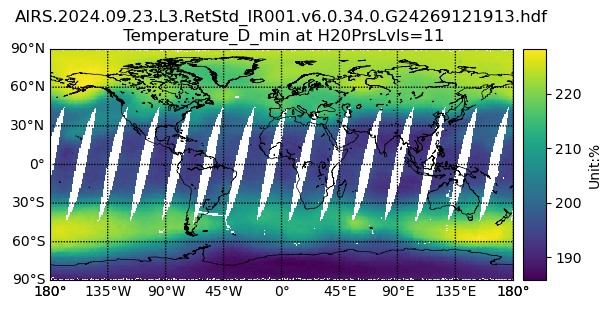

In [13]:
# Draw an equidistant cylindrical projection using the low resolution
# coastline database.
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat = 90,
            llcrnrlon=-180, urcrnrlon = 180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 181., 45.), labels=[0, 0, 0, 1])
x, y = m(longitude, latitude)
m.pcolormesh(x, y, data)
cb = m.colorbar()
cb.set_label('Unit:%')

plt.title('{0}\n {1} at H20PrsLvls=11'.format(FILE_NAME, DATAFIELD_NAME))
fig = plt.gcf()
# Show the plot window.
# plt.show()

In [14]:
# Save plot.
pngfile = f"../assets/plots/{FILE_NAME}.py.png"
fig.savefig(pngfile)